<a href="https://colab.research.google.com/github/nalika/NLP/blob/master/linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Example

    --------

    X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
    X = [[1, 1],
               [1, 2],
               [2, 2],
               [2, 3]]
               
   And the target Y is interpreted as a linear formula of the features of X
   y = C_0 * x_0 + C_1 * x_1 + b
   
y = np.dot(X, np.array([1, 2])) + 3


---



In [0]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


# Data loading

In [0]:
import io

from google.colab import files
uploaded = files.upload()



Saving housing.csv to housing.csv


### Load dataset: Remember the data to sequence arrangement. In this example, we consider the loaded data as already arranged into sequence. **So, can you figure out the the window size that used to to make the sequence?**

---




In [0]:

dataframe = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables


X = dataset[:,0:13] 
Y = dataset[:,13]

In [0]:
X[0,12], Y[0]

(4.98, 24.0)

In [0]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [0]:
dataframe.size

7084

# **Train and test dataset split**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train.size, x_test.size

(5915, 663)

# **Training**

In [0]:
model = linear_model.LinearRegression() # # Create linear regression object
model.fit(x_train, y_train)


# Testing

In [0]:
predicted = model.predict(x_test)
print('Coefficients: \n', model.coef_)
print("Mean squared error: %.2f" 
      % mean_squared_error(y_test, predicted))
print('Variance score: %.2f' % r2_score(y_test, predicted))

Coefficients: 
 [-1.09081768e-01  4.21434664e-02  7.17065798e-03  2.74999578e+00
 -1.84461880e+01  3.80287228e+00 -3.85144429e-03 -1.56617797e+00
  2.86201970e-01 -1.19604292e-02 -9.14818715e-01  7.03031271e-03
 -5.17555027e-01]
Mean squared error: 26.27
Variance score: 0.68


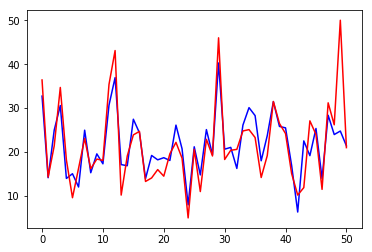

In [0]:
#predicted, y_test

plt.plot(predicted, color='blue')
plt.plot(y_test, color='red')
plt.show()